# Heart Disease Prediction on Cleveland Dataset

## Importing related Libraries

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.metrics import precision_score, recall_score, roc_auc_score, precision_recall_curve, auc
from sklearn.metrics import f1_score, fbeta_score, accuracy_score, average_precision_score, confusion_matrix, roc_curve
from sklearn.metrics import ConfusionMatrixDisplay 
from mlxtend.classifier import StackingCVClassifier
from sklearn.metrics import classification_report
import scipy.stats as st
import statsmodels.api as sm
import seaborn as sn

## Storing the Cleveland Dataset into the Dataframe

In [2]:
data = pd.read_csv('C:/Users/KIIT/Oracle/Desktop/HeartDiseasePrediction/ClevelandDataset.csv')

### Shape of the Dataframe

In [3]:
data.shape

(303, 14)

### Detailed Information of the Dataframe

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


### Names of the Columns present

In [5]:
for col in data.columns:
  print(col)

age
sex
cp
trtbps
chol
fbs
restecg
thalachh
exng
oldpeak
slp
caa
thall
target


### Describing the Dataset

In [6]:
data.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Data Cleaning

In [7]:
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Checking for Null Values

In [8]:
data.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
target      0
dtype: int64

### Checking for Duplicate Values and Removing 

In [9]:
print(data.duplicated().sum())

1


In [10]:
data_dup = data.duplicated().any()
data_dup

True

In [11]:
data = data.drop_duplicates()
data_dup = data.duplicated().any()
data_dup

False

In [12]:
data.shape

(302, 14)

In [13]:
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Data Types of Column in the Dataframe

In [14]:
data.dtypes

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
target        int64
dtype: object

## Exploratory Data Analysis (EDA)

### Distribution Plot of the Target Variable

<AxesSubplot:xlabel='target', ylabel='Density'>

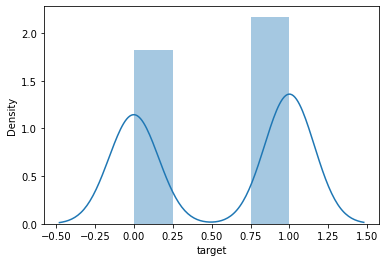

In [15]:
sns.distplot(data.target)

### Number of People with the Heart Disease

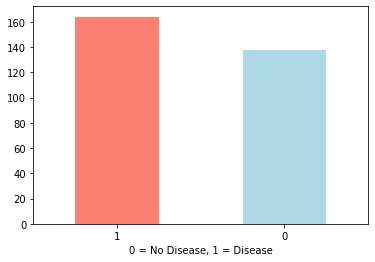

In [16]:
data["target"].value_counts().plot(kind = "bar", color = ["salmon", "lightblue"]);
plt.xlabel("0 = No Disease, 1 = Disease");
plt.xticks(rotation = 0);

In [17]:
data["target"].value_counts()

1    164
0    138
Name: target, dtype: int64

In [18]:
print("Ratio: %", round(data.target.value_counts()[0] / data.target.count(),4)*100)

Ratio: % 45.7


#### ***Oservation: 164 have the heart disease and 138 people don't have the disease, which implies that we are working with a balanced data frame.***

### Correlation Matrix Heatmap

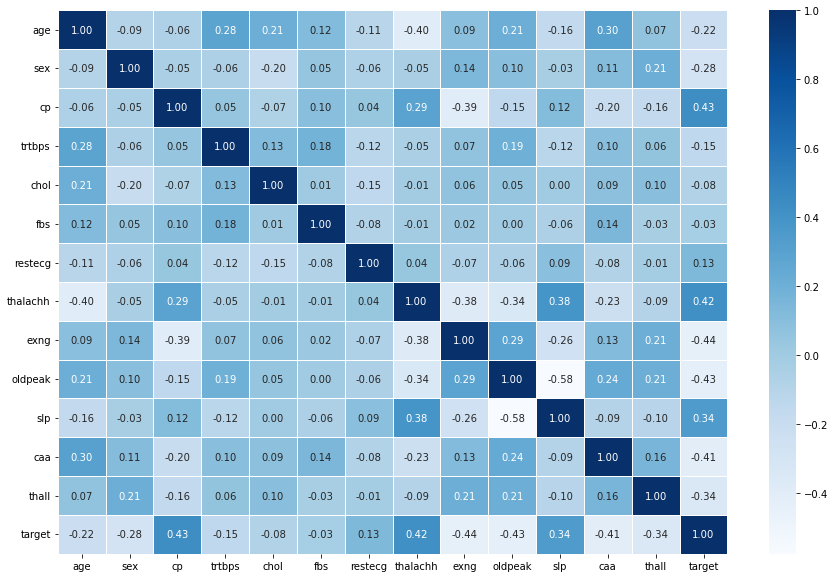

In [19]:
corr_matrix = data.corr()
fig, ax = plt.subplots(figsize = (15, 10))
sns.heatmap(corr_matrix,
            annot = True,
            linewidths = 0.5,
            fmt = ".2f",
            cmap = "Blues");

#### ***Observation: fbs and chol are the least correlated with the target variable. All other variables have a significant correlation with the target column.***

### Binary Values Histogram

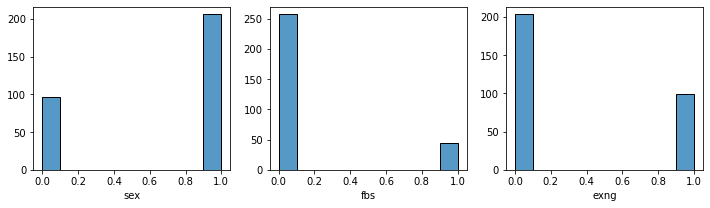

In [20]:
bin_features = ['sex', 'fbs', 'exng']
N = len(bin_features)
fig, axs = plt.subplots(1, N, figsize = (12, 3))

for n in range(N):
    sns.histplot(data = data, x = bin_features[n], ax = axs[n])
    axs[n].set_ylabel('')
plt.show()

### Categorical Values Histogram

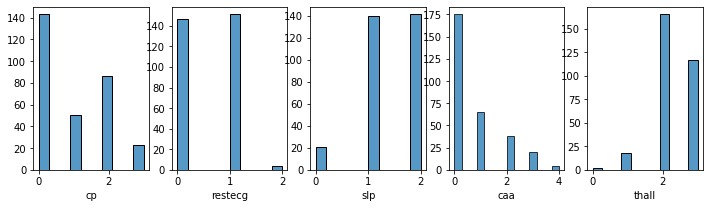

In [21]:
cat_features = ['cp', 'restecg', 'slp', 'caa', 'thall']
N = len(cat_features)
fig, axs = plt.subplots(1, N, figsize=(12, 3))

for n in range(N):
    sns.histplot(data = data, x = cat_features[n], ax = axs[n])
    axs[n].set_ylabel('')
plt.show()

#### ***Observations:***
#### ***1. cp- People with cp 1, 2, 3 are less likely to have heart disease than people with cp 0.***
#### ***2. restecg- People with a value of 1 (reporting an abnormal heart rhythm, which can range from mild symptoms to severe problems) are more likely to have heart disease.***
#### ***3. exang- People with a value of 0 (No — angina induced by exercise) have more heart disease than people with a value of 1 (Yes — angina induced by exercise).***
#### ***4. slope- People with a slope value of 2 (Downsloping: signs of an unhealthy heart) are more likely to have heart disease than people with a slope value of 0 slope is 0 (Upsloping: best heart rate with exercise) or 1 (Flatsloping: minimal change (typical healthy heart)).***
#### ***5. ca- The more blood movement the better, so people with ca equal to 0 are more likely to have heart disease.***
#### ***6. thal- People with a thal value of 2 are more likely to have heart disease.***

### Numerical Values Histogram

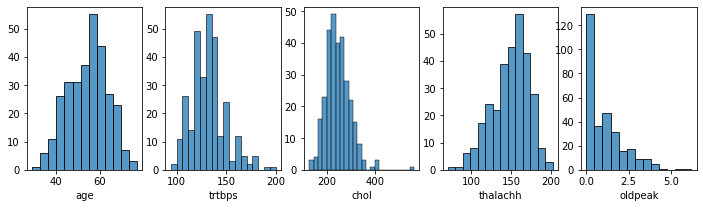

In [22]:
num_features = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
N = len(num_features)
fig, axs = plt.subplots(1, N, figsize=(12, 3))

for n in range(N):
    sns.histplot(data = data, x = num_features[n], ax = axs[n])
    axs[n].set_ylabel('')
plt.show()

#### ***Observations:***
#### ***1. trestbps- resting blood pressure on anything above 120–140 is of concern.***
#### ***2. chol- greater than 200 is of concern.***
#### ***3. thalach- people with a maximum heart rate of over 140 are more likely to have heart disease.***
#### ***4. oldpeak- the old peak of exercise-induced ST depression vs. rest looks at heart stress during exercise an unhealthy heart will stress more.***

### Scatter Plot(Age and Max Heart Rate Relation)

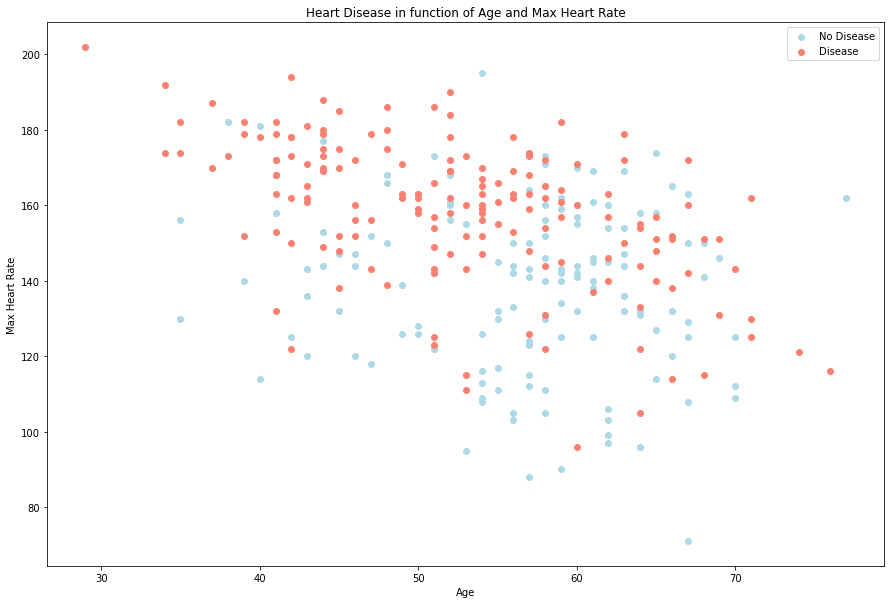

In [23]:
plt.figure(figsize = (15,10))
plt.scatter(data.age[data.target == 0],
            data.thalachh[data.target == 0],
            c = "lightblue")
plt.scatter(data.age[data.target == 1],
            data.thalachh[data.target == 1],
            c = "salmon")
plt.title("Heart Disease in function of Age and Max Heart Rate");
plt.xlabel("Age");
plt.ylabel("Max Heart Rate");
plt.legend(["No Disease", "Disease"]);

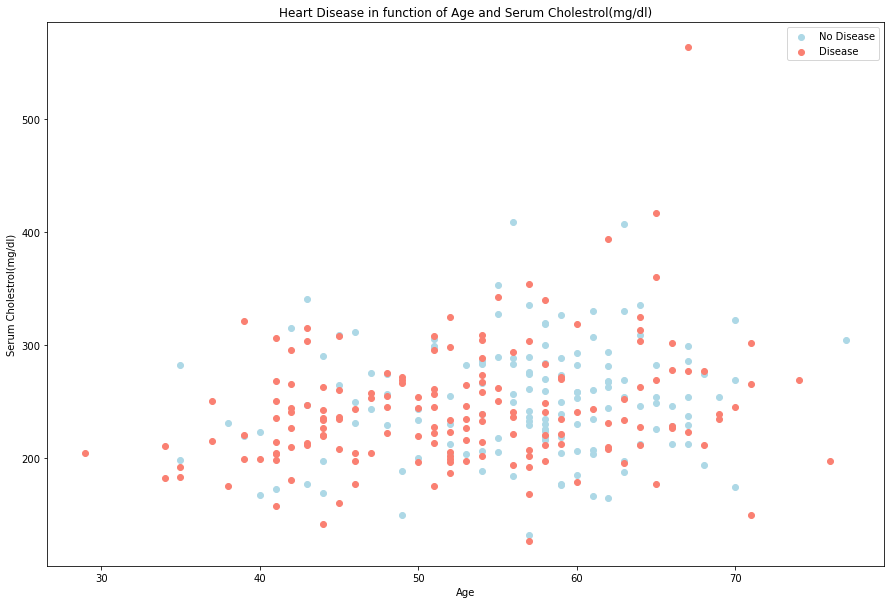

In [24]:
plt.figure(figsize = (15,10))
plt.scatter(data.age[data.target == 0],
            data.chol[data.target == 0],
            c = "lightblue")
plt.scatter(data.age[data.target == 1],
            data.chol[data.target == 1],
            c = "salmon")
plt.title("Heart Disease in function of Age and Serum Cholestrol(mg/dl)");
plt.xlabel("Age");
plt.ylabel("Serum Cholestrol(mg/dl)");
plt.legend(["No Disease", "Disease"]);

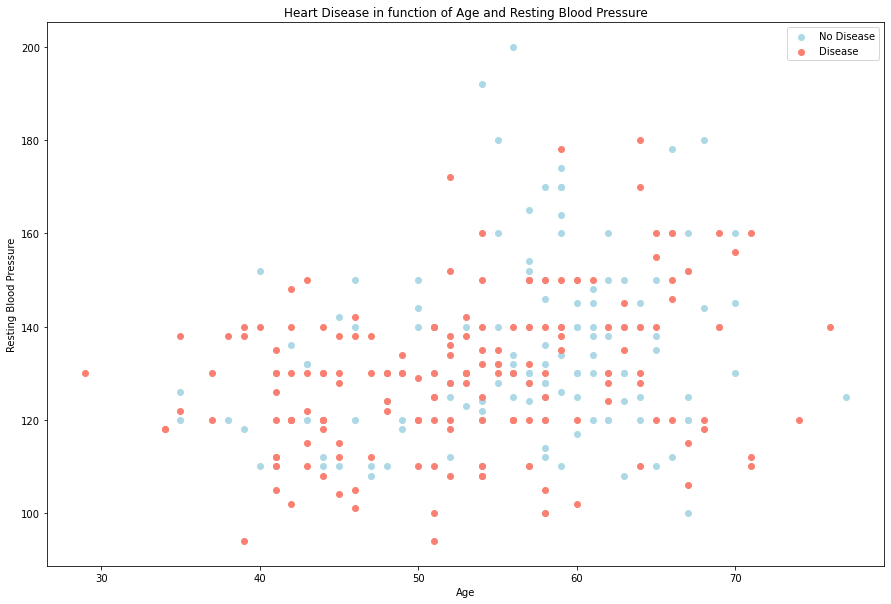

In [25]:
plt.figure(figsize = (15,10))
plt.scatter(data.age[data.target == 0],
            data.trtbps[data.target == 0],
            c = "lightblue")
plt.scatter(data.age[data.target == 1],
            data.trtbps[data.target == 1],
            c = "salmon")
plt.title("Heart Disease in function of Age and Resting Blood Pressure");
plt.xlabel("Age");
plt.ylabel("Resting Blood Pressure");
plt.legend(["No Disease", "Disease"]);

#### ***Observation: There are outliers present.***

## Data Preprocessing

In [26]:
cate_val = []
cont_val = []
for column in data.columns:
    if data[column].nunique() <=10:
        cate_val.append(column)
    else:
        cont_val.append(column)

In [27]:
cate_val

['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall', 'target']

In [28]:
cont_val

['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']

## Feature Scaling

In [29]:
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [30]:
from sklearn.preprocessing import StandardScaler
st = StandardScaler()
data[cont_val] = st.fit_transform(data[cont_val])
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,target
0,0.949794,1,3,0.764066,-0.261285,1,0,0.018826,0,1.084022,0,0,1,1
1,-1.928548,1,2,-0.091401,0.067741,0,1,1.636979,0,2.118926,0,0,2,1
2,-1.485726,0,1,-0.091401,-0.822564,0,0,0.980971,0,0.307844,2,0,2,1
3,0.174856,1,1,-0.661712,-0.203222,0,1,1.243374,0,-0.209608,2,0,2,1
4,0.285561,0,0,-0.661712,2.080602,0,1,0.587366,1,-0.382092,2,0,2,1


## Train-Test Split

In [31]:
from sklearn.model_selection import train_test_split
X = data.drop('target',axis=1)
y = data['target']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1, random_state = 0)
y_test

226    0
152    1
229    0
202    0
52     1
246    0
176    0
169    0
224    0
218    0
111    1
135    1
219    0
12     1
15     1
66     1
97     1
90     1
199    0
103    1
22     1
213    0
227    0
265    0
133    1
217    0
276    0
271    0
154    1
55     1
195    0
Name: target, dtype: int64

## Machine Learning Models

### 1. Logistic Regression

In [32]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(X_train,y_train)
y_pred1 = log.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred1)

0.9032258064516129

In [33]:
mse = mean_squared_error(y_test, y_pred1)
rmse = np.sqrt(mse)
print("RMSE: ", np.round(rmse, 2))

RMSE:  0.31



Training accuracy: 0.8634686346863468
Test accuracy    : 0.9032258064516129


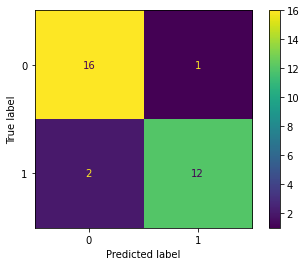

In [34]:
print('\nTraining accuracy:', log.score(X_train, y_train))
print('Test accuracy    :', log.score(X_test, y_test))

cm = confusion_matrix(y_test, y_pred1, labels = log.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = log.classes_)
disp.plot()
plt.show()

### 2. Support Vector Machine

In [35]:
from sklearn import svm
svm = svm.SVC(probability=True)
svm.fit(X_train,y_train)
y_pred2 = svm.predict(X_test)
accuracy_score(y_test,y_pred2)

0.8709677419354839

In [36]:
mse = mean_squared_error(y_test, y_pred2)
rmse = np.sqrt(mse)
print("RMSE: ", np.round(rmse, 2))

RMSE:  0.36



Training accuracy: 0.8745387453874539
Test accuracy    : 0.8709677419354839


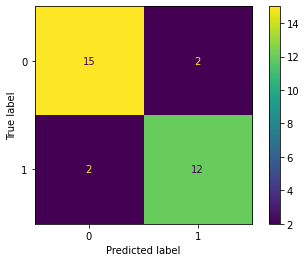

In [37]:
print('\nTraining accuracy:', svm.score(X_train, y_train))
print('Test accuracy    :', svm.score(X_test, y_test))

cm = confusion_matrix(y_test, y_pred2, labels = svm.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = svm.classes_)
disp.plot()
plt.show()

### 3. K-Neighbours Classifier

In [38]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred3 = knn.predict(X_test)
accuracy_score(y_test,y_pred3)

0.8709677419354839

In [39]:
mse = mean_squared_error(y_test, y_pred3)
rmse = np.sqrt(mse)
print("RMSE: ", np.round(rmse, 2))

RMSE:  0.36



Training accuracy: 0.8671586715867159
Test accuracy    : 0.8709677419354839


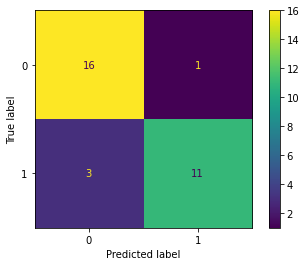

In [40]:
print('\nTraining accuracy:', knn.score(X_train, y_train))
print('Test accuracy    :', knn.score(X_test, y_test))

cm = confusion_matrix(y_test, y_pred3, labels = knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = knn.classes_)
disp.plot()
plt.show()

In [41]:
score = []
for k in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test)
    score.append(accuracy_score(y_test,y_pred))
score

[0.7096774193548387,
 0.7741935483870968,
 0.8387096774193549,
 0.8387096774193549,
 0.8709677419354839,
 0.8709677419354839,
 0.8387096774193549,
 0.8709677419354839,
 0.9032258064516129,
 0.9354838709677419,
 0.9032258064516129,
 0.9354838709677419,
 0.9032258064516129,
 0.9354838709677419,
 0.9354838709677419,
 0.9354838709677419,
 0.9354838709677419,
 0.9354838709677419,
 0.9354838709677419,
 0.9354838709677419,
 0.9354838709677419,
 0.9354838709677419,
 0.9354838709677419,
 0.9354838709677419,
 0.9354838709677419,
 0.9354838709677419,
 0.9354838709677419,
 0.9354838709677419,
 0.9032258064516129,
 0.9032258064516129,
 0.9032258064516129,
 0.9032258064516129,
 0.8709677419354839,
 0.8709677419354839,
 0.8709677419354839,
 0.8709677419354839,
 0.8709677419354839,
 0.8709677419354839,
 0.8387096774193549]

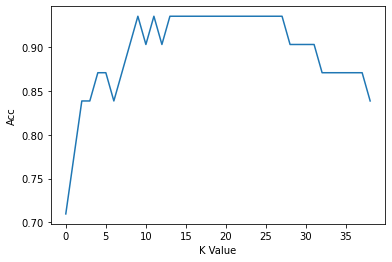

In [42]:
plt.plot(score)
plt.xlabel("K Value")
plt.ylabel("Acc")
plt.show()

In [43]:
knn=KNeighborsClassifier(n_neighbors = 2)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
accuracy_score(y_test,y_pred)

0.7741935483870968

In [44]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE: ", np.round(rmse, 2))

RMSE:  0.48



Training accuracy: 0.8782287822878229
Test accuracy    : 0.7741935483870968


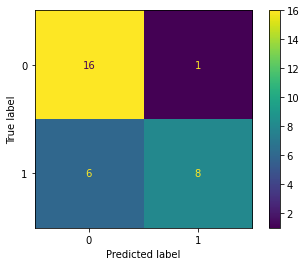

In [45]:
print('\nTraining accuracy:', knn.score(X_train, y_train))
print('Test accuracy    :', knn.score(X_test, y_test))

cm = confusion_matrix(y_test, y_pred, labels = knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = knn.classes_)
disp.plot()
plt.show()

### 4. Decision Tree Classifier

In [46]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred4= dt.predict(X_test)
accuracy_score(y_test,y_pred4)

0.7741935483870968

In [47]:
mse = mean_squared_error(y_test, y_pred4)
rmse = np.sqrt(mse)
print("RMSE: ", np.round(rmse, 2))

RMSE:  0.48



Training accuracy: 1.0
Test accuracy    : 0.7741935483870968


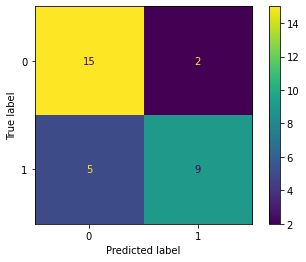

In [48]:
print('\nTraining accuracy:', dt.score(X_train, y_train))
print('Test accuracy    :', dt.score(X_test, y_test))

cm = confusion_matrix(y_test, y_pred4, labels = dt.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = dt.classes_)
disp.plot()
plt.show()

### 5. Random Forest Regression

In [49]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred5= rf.predict(X_test)
accuracy_score(y_test,y_pred5)

0.8709677419354839

In [50]:
mse = mean_squared_error(y_test, y_pred5)
rmse = np.sqrt(mse)
print("RMSE: ", np.round(rmse, 2))

RMSE:  0.36



Training accuracy: 1.0
Test accuracy    : 0.8709677419354839


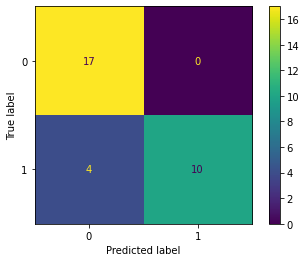

In [51]:
print('\nTraining accuracy:', rf.score(X_train, y_train))
print('Test accuracy    :', rf.score(X_test, y_test))

cm = confusion_matrix(y_test, y_pred5, labels = rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = rf.classes_)
disp.plot()
plt.show()

### 6. Gradient Boosting Classifier

In [52]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train,y_train)
y_pred6 = gbc.predict(X_test)
accuracy_score(y_test,y_pred6)

0.8387096774193549

In [53]:
mse = mean_squared_error(y_test, y_pred6)
rmse = np.sqrt(mse)
print("RMSE: ", np.round(rmse, 2))

RMSE:  0.4



Training accuracy: 0.992619926199262
Test accuracy    : 0.8387096774193549


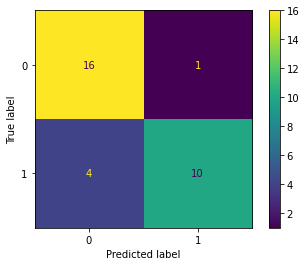

In [54]:
print('\nTraining accuracy:', gbc.score(X_train, y_train))
print('Test accuracy    :', gbc.score(X_test, y_test))

cm = confusion_matrix(y_test, y_pred6, labels = gbc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = gbc.classes_)
disp.plot()
plt.show()

### 7. Gaussian Naive Bayes

In [55]:
from sklearn.naive_bayes import GaussianNB
nbml = GaussianNB()
nbml.fit(X_train, y_train)
y_pred7 = nbml.predict(X_test)
accuracy_score(y_test, y_pred7)

0.9354838709677419

In [56]:
mse = mean_squared_error(y_test, y_pred7)
rmse = np.sqrt(mse)
print("RMSE: ", np.round(rmse, 2))

RMSE:  0.25



Training accuracy: 0.8228782287822878
Test accuracy    : 0.9354838709677419


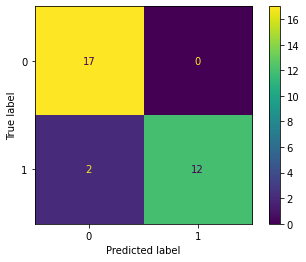

In [57]:
print('\nTraining accuracy:', nbml.score(X_train, y_train))
print('Test accuracy    :', nbml.score(X_test, y_test))

cm = confusion_matrix(y_test, y_pred7, labels = nbml.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = nbml.classes_)
disp.plot()
plt.show()

### 8. Bernoulli Naive Bayes

In [58]:
from sklearn.naive_bayes import BernoulliNB
nb_ber = BernoulliNB()
nb_ber.fit(X_train, y_train)
y_pred8 = nb_ber.predict(X_test)
accuracy_score(y_test, y_pred8)

0.9354838709677419

In [59]:
mse = mean_squared_error(y_test, y_pred8)
rmse = np.sqrt(mse)
print("RMSE: ", np.round(rmse, 2))

RMSE:  0.25



Training accuracy: 0.8228782287822878
Test accuracy    : 0.9354838709677419


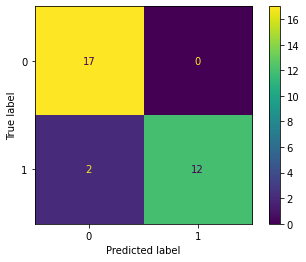

In [60]:
print('\nTraining accuracy:', nb_ber.score(X_train, y_train))
print('Test accuracy    :', nb_ber.score(X_test, y_test))

cm = confusion_matrix(y_test, y_pred8, labels = nb_ber.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = nb_ber.classes_)
disp.plot()
plt.show()

### Model Comparison

In [61]:
def print_results(headline, true_value, pred, probs):
    scores=[]
    CM = confusion_matrix(true_value, pred)
    scores.append(headline)
    scores.append(accuracy_score(true_value, pred))
    scores.append(int(CM[1,1]))
    scores.append(int(CM[0,1]))
    scores.append(int(CM[0][0]))
    scores.append(int(CM[1][0]))
    scores.append(precision_score(true_value, pred))
    scores.append(recall_score(true_value, pred))
    scores.append(roc_auc_score(true_value, probs))
    p, r, _ = precision_recall_curve(true_value, probs)
    scores.append(auc(r,p))
    scores.append(f1_score(true_value, pred))
    scores.append(fbeta_score(true_value, pred, beta=2)) 
    return scores

score_names = ['Method','Accuracy','TP','FP','TN','FN','Precision','Recall','ROC_AUC','PR_AUC','F1_Score', 'F2_Score']
dfAcc = pd.DataFrame(data=np.zeros(shape=(0,12)), columns = score_names)

In [62]:
pred_probs = log.predict_proba(X_test)[:,1]
scores = print_results('Logistic Regression', y_test, log.predict(X_test), pred_probs)
dftmp = pd.DataFrame([scores], columns=score_names)
dfAcc = pd.concat([dfAcc, dftmp], ignore_index=True)

pred_probs = svm.predict_proba(X_test)[:,1]
scores = print_results('Support Vector Classifier', y_test, svm.predict(X_test), pred_probs)
dftmp = pd.DataFrame([scores], columns=score_names)
dfAcc = pd.concat([dfAcc, dftmp], ignore_index=True)

pred_probs = knn.predict_proba(X_test)[:,1]
scores = print_results('K-Neighbours Classifier', y_test, knn.predict(X_test), pred_probs)
dftmp = pd.DataFrame([scores], columns=score_names)
dfAcc = pd.concat([dfAcc, dftmp], ignore_index=True)

pred_probs = dt.predict_proba(X_test)[:,1]
scores = print_results('Decision Tree Classifier', y_test, dt.predict(X_test), pred_probs)
dftmp = pd.DataFrame([scores], columns=score_names)
dfAcc = pd.concat([dfAcc, dftmp], ignore_index=True)

pred_probs = rf.predict_proba(X_test)[:,1]
scores = print_results('Random Forest Classifier', y_test, rf.predict(X_test), pred_probs)
dftmp = pd.DataFrame([scores], columns=score_names)
dfAcc = pd.concat([dfAcc, dftmp], ignore_index=True)

pred_probs = gbc.predict_proba(X_test)[:,1]
scores = print_results('Gradient Boosting Classifier', y_test, gbc.predict(X_test), pred_probs)
dftmp = pd.DataFrame([scores], columns=score_names)
dfAcc = pd.concat([dfAcc, dftmp], ignore_index=True)

pred_probs = nbml.predict_proba(X_test)[:,1]
scores = print_results('Gaussian Naive Bayes', y_test, nbml.predict(X_test), pred_probs)
dftmp = pd.DataFrame([scores], columns=score_names)
dfAcc = pd.concat([dfAcc, dftmp], ignore_index=True)

pred_probs = nb_ber.predict_proba(X_test)[:,1]
scores = print_results('Bernoulli Naive Bayes', y_test, nb_ber.predict(X_test), pred_probs)
dftmp = pd.DataFrame([scores], columns=score_names)
dfAcc = pd.concat([dfAcc, dftmp], ignore_index=True)

dfAcc

,Method,Accuracy,TP,FP,TN,FN,Precision,Recall,ROC_AUC,PR_AUC,F1_Score,F2_Score
0,Logistic Regression,0.903226,12.0,1.0,16.0,2.0,0.923077,0.857143,0.941176,0.949937,0.888889,0.869565
1,Support Vector Classifier,0.870968,12.0,2.0,15.0,2.0,0.857143,0.857143,0.936975,0.947750,0.857143,0.857143
2,K-Neighbours Classifier,0.774194,8.0,1.0,16.0,6.0,0.888889,0.571429,0.852941,0.859639,0.695652,0.615385
3,Decision Tree Classifier,0.774194,9.0,2.0,15.0,5.0,0.818182,0.642857,0.762605,0.811165,0.720000,0.671642
4,Random Forest Classifier,0.870968,10.0,0.0,17.0,4.0,1.000000,0.714286,0.936975,0.950585,0.833333,0.757576
5,Gradient Boosting Classifier,0.838710,10.0,1.0,16.0,4.0,0.909091,0.714286,0.882353,0.910915,0.800000,0.746269
6,Gaussian Naive Bayes,0.935484,12.0,0.0,17.0,2.0,1.000000,0.857143,0.928571,0.943933,0.923077,0.882353
7,Bernoulli Naive Bayes,0.935484,12.0,0.0,17.0,2.0,1.000000,0.857143,1.000000,1.000000,0.923077,0.882353


## Feature Selection: Backward Elimination (P-value Approach)

In [63]:
from statsmodels.tools import add_constant as add_constant
data_constant = add_constant(data)
data_constant.head()

,const,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,target
0,1.0,0.949794,1,3,0.764066,-0.261285,1,0,0.018826,0,1.084022,0,0,1,1
1,1.0,-1.928548,1,2,-0.091401,0.067741,0,1,1.636979,0,2.118926,0,0,2,1
2,1.0,-1.485726,0,1,-0.091401,-0.822564,0,0,0.980971,0,0.307844,2,0,2,1
3,1.0,0.174856,1,1,-0.661712,-0.203222,0,1,1.243374,0,-0.209608,2,0,2,1
4,1.0,0.285561,0,0,-0.661712,2.080602,0,1,0.587366,1,-0.382092,2,0,2,1


In [64]:
st.chisqprob = lambda chisq, df: st.chi2.sf(chisq, df)
cols = data_constant.columns[:-1]
model = sm.Logit(data.target, data_constant[cols])
result = model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.348265
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 target   No. Observations:                  302
Model:                          Logit   Df Residuals:                      288
Method:                           MLE   Df Model:                           13
Date:                Sun, 30 Apr 2023   Pseudo R-squ.:                  0.4949
Time:                        19:40:25   Log-Likelihood:                -105.18
converged:                       True   LL-Null:                       -208.21
Covariance Type:            nonrobust   LLR p-value:                 7.740e-37
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.3750      0.886      2.680      0.007       0.638       4.112
age           -0.0133      0.212     -0.063      0.950      -0.429       0.402
sex           -1.7509      0.468     -3.740      0.000      -2.669      -0.833
cp             0.8473      0.186      4.566      0.000       0.484       1.211
trtbps        -0.3540      0.182     -1.944      0.052      -0.711       0.003
chol          -0.2319      0.197     -1.179      0.238      -0.617       0.154
fbs            0.0735      0.532      0.138      0.890      -0.970       1.117
restecg        0.4506      0.349      1.293      0.196      -0.232       1.134
thalachh       0.5290      0.239      2.214      0.027       0.061       0.997
exng          -0.9810      0.410     -2.394      0.017      -1.784      -0.178
oldpeak       -0.6071      0.249     -2.441      0.015      -1.095      -0.120
slp            0.5891      0.350      1.684      0.092      -0.097       1.275
caa           -0.8260      0.202     -4.091      0.000      -1.222      -0.430
thall         -0.8872      0.291     -3.052      0.002      -1.457      -0.317
==============================================================================
"""

In [65]:
def back_feature_elem (data_frame, dep_var, col_list):
    """ Takes in the dataframe, the dependent variable and a list of column names, runs the regression repeatedly eleminating feature with the highest
    P-value above alpha one at a time and returns the regression summary with all p-values below alpha"""

    while len(col_list) > 0 :
        model = sm.Logit(dep_var, data_frame[col_list])
        result = model.fit(disp = 0)
        largest_pvalue = round(result.pvalues, 3).nlargest(1)
        if largest_pvalue[0]<(0.05):
            return result
            break
        else: 
            col_list=col_list.drop(largest_pvalue.index)

result = back_feature_elem(data_constant, data.target, cols)

In [66]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 target   No. Observations:                  302
Model:                          Logit   Df Residuals:                      293
Method:                           MLE   Df Model:                            8
Date:                Sun, 30 Apr 2023   Pseudo R-squ.:                  0.4781
Time:                        19:40:26   Log-Likelihood:                -108.67
converged:                       True   LL-Null:                       -208.21
Covariance Type:            nonrobust   LLR p-value:                 9.962e-39
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.2783      0.745      4.398      0.000       1.817       4.739
sex           -1.5153      0.420     -3.604      0.000      -2.339      -0.691
cp             0.8177      0.178      4.604      0.000       0.470       1.166
trtbps        -0.3624      0.172     -2.112      0.035      -0.699      -0.026
thalachh       0.5799      0.208      2.781      0.005       0.171       0.988
exng          -0.9937      0.398     -2.496      0.013      -1.774      -0.213
oldpeak       -0.7976      0.216     -3.689      0.000      -1.221      -0.374
caa           -0.7590      0.186     -4.072      0.000      -1.124      -0.394
thall         -0.8911      0.281     -3.175      0.001      -1.441      -0.341
==============================================================================
"""

In [67]:
params = np.exp(result.params)
conf = np.exp(result.conf_int())
conf['OR'] = params
pvalue = round(result.pvalues, 3)
conf['pvalue'] = pvalue
conf.columns = ['CI 95%(2.5%)', 'CI 95%(97.5%)', 'Odds Ratio', 'pvalue']
print((conf))

          CI 95%(2.5%)  CI 95%(97.5%)  Odds Ratio  pvalue
const         6.156328     114.329148   26.530129   0.000
sex           0.096392       0.500898    0.219733   0.000
cp            1.599332       3.208295    2.265199   0.000
trtbps        0.497245       0.974306    0.696038   0.035
thalachh      1.186809       2.687192    1.785828   0.005
exng          0.169666       0.807791    0.370209   0.013
oldpeak       0.294823       0.688047    0.450391   0.000
caa           0.324879       0.674604    0.468150   0.000
thall         0.236635       0.711046    0.410194   0.001


## Train-Test Split

In [68]:
import sklearn
new_features = data[['sex','cp','thalachh','exng','oldpeak','caa','thall','target']]
x = new_features.iloc[:,:-1]
y = new_features.iloc[:,-1]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.1, random_state = 0)

## Enhancement of Machine Learning Models

### 1. Logistic Regression

In [69]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train,y_train)
y_pred = logreg.predict(x_test)

In [70]:
sklearn.metrics.accuracy_score(y_test,y_pred)

0.9354838709677419

<AxesSubplot:>

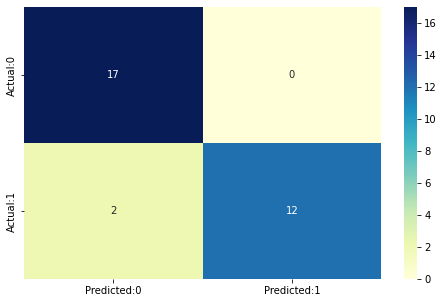

In [71]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'],index = ['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sn.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu")

In [72]:
TN=cm[0,0]
TP=cm[1,1]
FN=cm[1,0]
FP=cm[0,1]
sensitivity=TP/float(TP+FN)
specificity=TN/float(TN+FP)

In [73]:
print('The acuuracy of the model = TP+TN/(TP+TN+FP+FN) = ',(TP+TN)/float(TP+TN+FP+FN),'\n',

'The Missclassification = 1-Accuracy = ',1-((TP+TN)/float(TP+TN+FP+FN)),'\n',

'Sensitivity or True Positive Rate = TP/(TP+FN) = ',TP/float(TP+FN),'\n',

'Specificity or True Negative Rate = TN/(TN+FP) = ',TN/float(TN+FP),'\n',

'Positive Predictive value = TP/(TP+FP) = ',TP/float(TP+FP),'\n',

'Negative predictive Value = TN/(TN+FN) = ',TN/float(TN+FN),'\n',

'Positive Likelihood Ratio = Sensitivity/(1-Specificity) = ',sensitivity/(1-specificity),'\n',

'Negative likelihood Ratio = (1-Sensitivity)/Specificity = ',(1-sensitivity)/specificity)

The acuuracy of the model = TP+TN/(TP+TN+FP+FN) =  0.9354838709677419 
 The Missclassification = 1-Accuracy =  0.06451612903225812 
 Sensitivity or True Positive Rate = TP/(TP+FN) =  0.8571428571428571 
 Specificity or True Negative Rate = TN/(TN+FP) =  1.0 
 Positive Predictive value = TP/(TP+FP) =  1.0 
 Negative predictive Value = TN/(TN+FN) =  0.8947368421052632 
 Positive Likelihood Ratio = Sensitivity/(1-Specificity) =  inf 
 Negative likelihood Ratio = (1-Sensitivity)/Specificity =  0.1428571428571429


### 2. Gaussian Naive Bayes

In [74]:
from sklearn.naive_bayes import GaussianNB
nbml = GaussianNB()
nbml.fit(x_train, y_train)
y_pred1 = nbml.predict(x_test)

In [75]:
sklearn.metrics.accuracy_score(y_test, y_pred1)

0.9354838709677419

<AxesSubplot:>

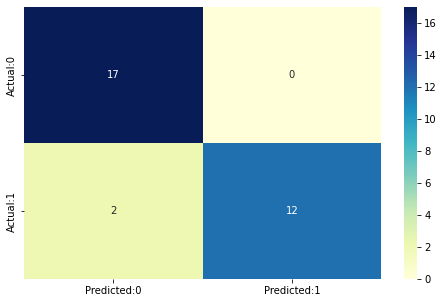

In [76]:
from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(y_test, y_pred1)
conf_matrix = pd.DataFrame(data = cm1,columns = ['Predicted:0','Predicted:1'],index = ['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sn.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu")

In [77]:
TN=cm1[0,0]
TP=cm1[1,1]
FN=cm1[1,0]
FP=cm1[0,1]
sensitivity=TP/float(TP+FN)
specificity=TN/float(TN+FP)

In [78]:
print('The acuuracy of the model = TP+TN/(TP+TN+FP+FN) = ',(TP+TN)/float(TP+TN+FP+FN),'\n',

'The Missclassification = 1-Accuracy = ',1-((TP+TN)/float(TP+TN+FP+FN)),'\n',

'Sensitivity or True Positive Rate = TP/(TP+FN) = ',TP/float(TP+FN),'\n',

'Specificity or True Negative Rate = TN/(TN+FP) = ',TN/float(TN+FP),'\n',

'Positive Predictive value = TP/(TP+FP) = ',TP/float(TP+FP),'\n',

'Negative predictive Value = TN/(TN+FN) = ',TN/float(TN+FN),'\n',

'Positive Likelihood Ratio = Sensitivity/(1-Specificity) = ',sensitivity/(1-specificity),'\n',

'Negative likelihood Ratio = (1-Sensitivity)/Specificity = ',(1-sensitivity)/specificity)

The acuuracy of the model = TP+TN/(TP+TN+FP+FN) =  0.9354838709677419 
 The Missclassification = 1-Accuracy =  0.06451612903225812 
 Sensitivity or True Positive Rate = TP/(TP+FN) =  0.8571428571428571 
 Specificity or True Negative Rate = TN/(TN+FP) =  1.0 
 Positive Predictive value = TP/(TP+FP) =  1.0 
 Negative predictive Value = TN/(TN+FN) =  0.8947368421052632 
 Positive Likelihood Ratio = Sensitivity/(1-Specificity) =  inf 
 Negative likelihood Ratio = (1-Sensitivity)/Specificity =  0.1428571428571429


### 3. Random Forest

In [79]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred2 = rf.predict(x_test)

In [80]:
sklearn.metrics.accuracy_score(y_test,y_pred2)

0.8709677419354839

<AxesSubplot:>

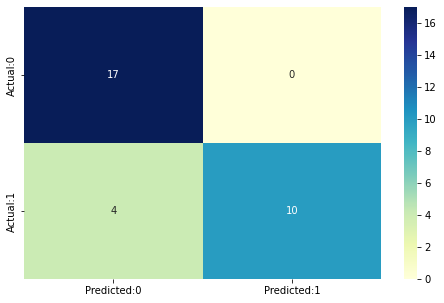

In [81]:
from sklearn.metrics import confusion_matrix
cm2 = confusion_matrix(y_test, y_pred2)
conf_matrix = pd.DataFrame(data = cm2,columns = ['Predicted:0','Predicted:1'],index = ['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sn.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu")

In [82]:
TN=cm2[0,0]
TP=cm2[1,1]
FN=cm2[1,0]
FP=cm2[0,1]
sensitivity=TP/float(TP+FN)
specificity=TN/float(TN+FP)

In [83]:
print('The acuuracy of the model = TP+TN/(TP+TN+FP+FN) = ',(TP+TN)/float(TP+TN+FP+FN),'\n',

'The Missclassification = 1-Accuracy = ',1-((TP+TN)/float(TP+TN+FP+FN)),'\n',

'Sensitivity or True Positive Rate = TP/(TP+FN) = ',TP/float(TP+FN),'\n',

'Specificity or True Negative Rate = TN/(TN+FP) = ',TN/float(TN+FP),'\n',

'Positive Predictive value = TP/(TP+FP) = ',TP/float(TP+FP),'\n',

'Negative predictive Value = TN/(TN+FN) = ',TN/float(TN+FN),'\n',

'Positive Likelihood Ratio = Sensitivity/(1-Specificity) = ',sensitivity/(1-specificity),'\n',

'Negative likelihood Ratio = (1-Sensitivity)/Specificity = ',(1-sensitivity)/specificity)

The acuuracy of the model = TP+TN/(TP+TN+FP+FN) =  0.8709677419354839 
 The Missclassification = 1-Accuracy =  0.12903225806451613 
 Sensitivity or True Positive Rate = TP/(TP+FN) =  0.7142857142857143 
 Specificity or True Negative Rate = TN/(TN+FP) =  1.0 
 Positive Predictive value = TP/(TP+FP) =  1.0 
 Negative predictive Value = TN/(TN+FN) =  0.8095238095238095 
 Positive Likelihood Ratio = Sensitivity/(1-Specificity) =  inf 
 Negative likelihood Ratio = (1-Sensitivity)/Specificity =  0.2857142857142857
